In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import pickle

In [3]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv')

# The Dataset and Problem Statement

The dataset we are working with in this project comes from the UCI Machine Learning Repository. It contains 30 movies that have different genres and IMDB ratings. Our job is to fit these films onto a feature space through a kNN and have a user input a movie, in this case the movie has been predetermined to be "The Post", with the top 5 recommended movies being returned (in other words k = 5). 

# Data Quality Analysis

In [4]:
df.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie ID     30 non-null     int64  
 1   Movie Name   30 non-null     object 
 2   IMDB Rating  30 non-null     float64
 3   Biography    30 non-null     int64  
 4   Drama        30 non-null     int64  
 5   Thriller     30 non-null     int64  
 6   Comedy       30 non-null     int64  
 7   Crime        30 non-null     int64  
 8   Mystery      30 non-null     int64  
 9   History      30 non-null     int64  
 10  Label        30 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.7+ KB


In [6]:
#checking for percent of missing values
df.isna().sum()/len(df)*100
#no missing values found

Movie ID       0.0
Movie Name     0.0
IMDB Rating    0.0
Biography      0.0
Drama          0.0
Thriller       0.0
Comedy         0.0
Crime          0.0
Mystery        0.0
History        0.0
Label          0.0
dtype: float64

In [7]:
#checking to see if we have any duplicates in our rows
df['Movie Name'].nunique() - len(df['Movie Name'])
#no duplicates found

0

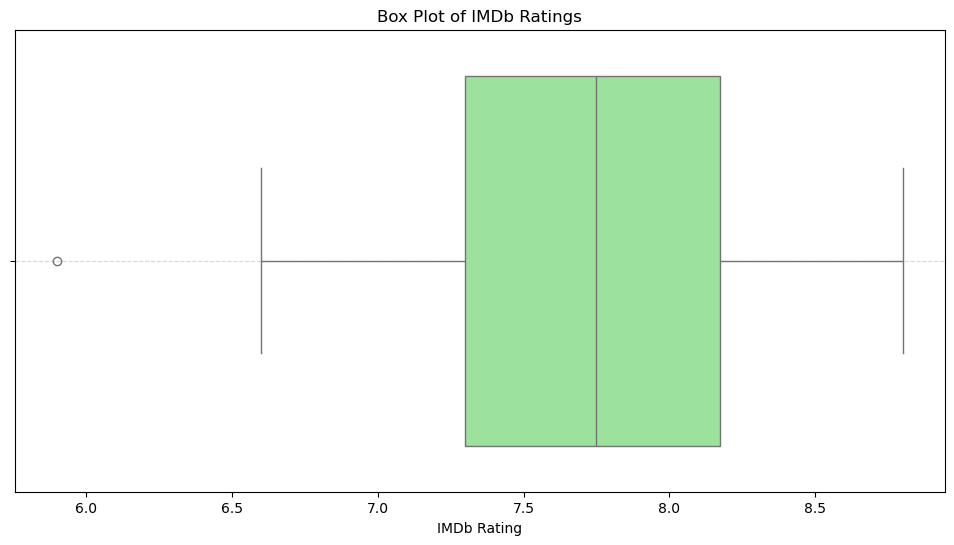

In [8]:
#checking the distribution of IMDB ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='IMDB Rating', data=df, color='lightgreen')
plt.title('Box Plot of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

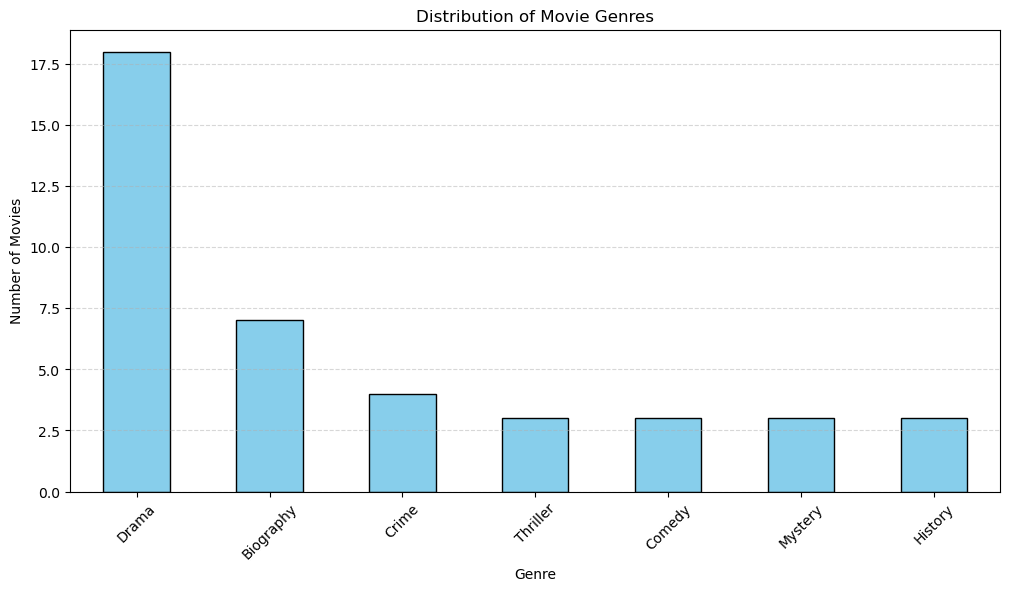

In [9]:
#looking at the distribution of movie genres
genre_columns = ['Biography', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'History']
genre_df = df[genre_columns]
genre_counts = genre_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Overall our data looks to be clean with no missing values or significant outliers. Next we will move on to some preprocessing to get it ready for our model.

# Data Preprocessing

First we need to subset our features that will actually be used in the model.

In [10]:
features = df.drop(['Movie ID', 'Movie Name', 'Label'], axis=1)

Because our IMDB rating has a different scale than our other features, we'll normalize it so that it doesn't distort the distance calculation.

In [11]:
scaler = MinMaxScaler()
features['IMDB Rating'] = scaler.fit_transform(features[['IMDB Rating']])

In [12]:
features.head()

,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
0,0.724138,1,1,1,0,0,0,0
1,0.620690,0,1,0,0,0,1,0
2,0.793103,1,1,0,0,0,0,0
3,0.827586,0,1,0,0,0,0,0
4,1.000000,0,1,0,0,0,0,0


That's all the preprocessing that is necessary for this dataset. Next we'll move on to the actual model creation.

# kNN Implementation

First we define the number of movies we want to recommend to our user and fit our features in the model.

In [13]:
k = 5 #number of movie recommendations we want
model = NearestNeighbors(n_neighbors=k, metric='euclidean')
model.fit(features)

NearestNeighbors(metric='euclidean')

Now we define our vector for the movie "The Post", performing a MinMax scaler on the IMDB rating to match our dataset used in the model.

In [14]:
the_post_scaled = scaler.transform([[7.2]])[0][0]
the_post_vector = [[the_post_scaled, 1, 1, 0, 0, 0, 0, 1]]

/Users/tommyropp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Finally, we find the nearest neighbors and display the results

In [15]:
distances, indices = model.kneighbors(the_post_vector)

print("\nTop 5 recommended movies:")
for index in indices[0]:
    print(df.iloc[index]['Movie Name'])


Top 5 recommended movies:
12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind


/Users/tommyropp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Above we can see the recommended movies that the user would see through the applications front end.

In [17]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)